In [1]:
#Library
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Modules
import statsmodels.api as sm 
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from datetime import datetime


In [2]:
df = pd.read_csv('Nashville_housing_data.csv')

In [3]:
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [5]:
# Suite/ Condo # is null so dropping hte colun
df = df.drop(columns = 'Suite/ Condo   #')

In [6]:
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [7]:
df.isnull().sum()

Unnamed: 0                             0
Parcel ID                              0
Land Use                               0
Property Address                       2
Property City                          2
Sale Date                              0
Legal Reference                        0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
State                                  0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compa

In [8]:
df['Property City'].value_counts()

NASHVILLE         18010
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           158
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: Property City, dtype: int64

In [9]:
df['City'].value_counts()

NASHVILLE         18013
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: City, dtype: int64

In [10]:
# Check if the two columns have different values anywhere
# Find and display values of 'Property City' and 'City' where they differ
different_values = df[['Property City', 'City']][df['Property City'] != df['City']]

if not different_values.empty:
    print("Values of 'Property City' and 'City' where they differ:")
    print(different_values)
else:
    print("The two columns have the same values everywhere.")

Values of 'Property City' and 'City' where they differ:
      Property City       City
13063     BRENTWOOD  NASHVILLE
17529           NaN  NASHVILLE
17696           NaN  NASHVILLE


In [11]:
df['State'].value_counts()

TN    22651
Name: State, dtype: int64

In [12]:
# Dropping Unnamed: 0, Parcel ID, Property Address, Property City, Legal Reference, State 
# List of columns to drop
columns_to_drop = ["Unnamed: 0", "Parcel ID", "Property Address", "Property City", "Legal Reference", "Neighborhood","State"]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22651 non-null  object 
 1   Sale Date                          22651 non-null  object 
 2   Sold As Vacant                     22651 non-null  object 
 3   Multiple Parcels Involved in Sale  22651 non-null  object 
 4   City                               22651 non-null  object 
 5   Acreage                            22651 non-null  float64
 6   Tax District                       22651 non-null  object 
 7   Land Value                         22651 non-null  int64  
 8   Building Value                     22651 non-null  int64  
 9   Finished Area                      22650 non-null  float64
 10  Foundation Type                    22650 non-null  object 
 11  Year Built                         22651 non-null  int

In [14]:
df.isnull().sum()

Land Use                               0
Sale Date                              0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
Acreage                                0
Tax District                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
dtype: int64

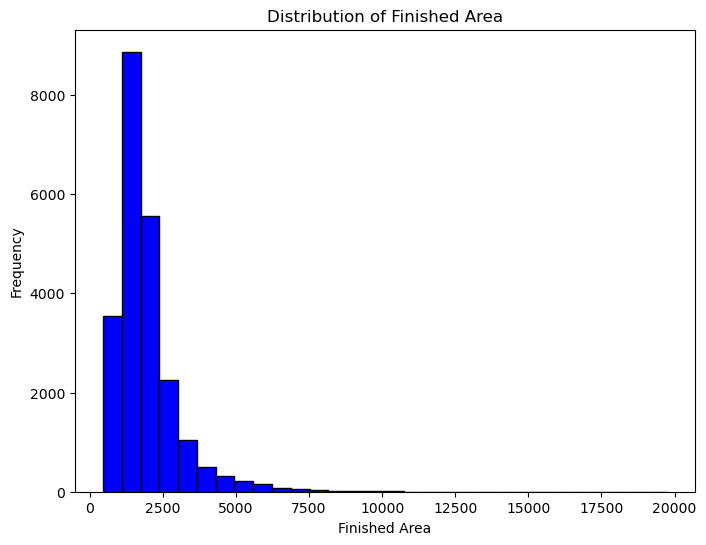

count    22650.000000
mean      1915.377151
std       1079.094521
min        450.000000
25%       1250.000000
50%       1645.824995
75%       2213.375000
max      19728.249880
Name: Finished Area, dtype: float64
Mean: 1915.3771510516558
Median: 1645.824995
Standard Deviation: 1079.0945212042864


In [15]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Finished Area'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Finished Area')
plt.xlabel('Finished Area')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of the Finished Area
summary_stats = df['Finished Area'].describe()
print(summary_stats)

# You can also print specific statistics
print(f"Mean: {summary_stats['mean']}")
print(f"Median: {summary_stats['50%']}")  # 50% is equivalent to the median
print(f"Standard Deviation: {summary_stats['std']}")

In [16]:
# Filling missing values with the median
median_finished_area = df['Finished Area'].median()
df['Finished Area'].fillna(median_finished_area, inplace=True)

In [17]:
df['Foundation Type'].value_counts()

CRAWL        14210
FULL BSMT     3823
PT BSMT       3146
SLAB          1431
PIERS           36
TYPICAL          4
Name: Foundation Type, dtype: int64

In [18]:
# Calculate the mode of the 'Foundation Type' column
mode_foundation = df['Foundation Type'].mode()[0]

# Replace missing values with the mode
df['Foundation Type'].fillna(mode_foundation, inplace=True)

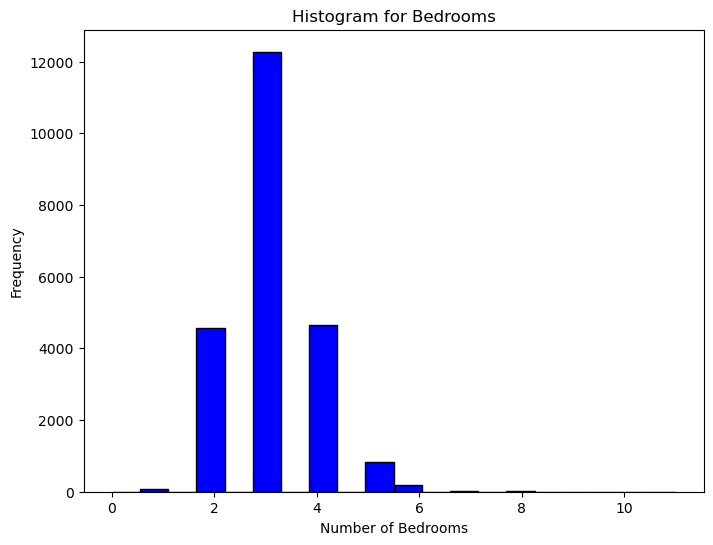

In [19]:
# Create a histogram for the 'Bedrooms' column
plt.figure(figsize=(8, 6))
plt.hist(df['Bedrooms'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram for Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Replace missing values in the 'Bedrooms' column with 3
df['Bedrooms'].fillna(3, inplace=True)

In [21]:
# Drop rows with missing values
df.dropna(inplace=True)

In [22]:
df['Tax District'].value_counts()

URBAN SERVICES DISTRICT      17418
GENERAL SERVICES DISTRICT     3853
CITY OF OAK HILL               348
CITY OF FOREST HILLS           345
CITY OF GOODLETTSVILLE         344
CITY OF BELLE MEADE            214
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

In [23]:
df['Foundation Type'].value_counts()

CRAWL        14153
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
PIERS           36
TYPICAL          4
Name: Foundation Type, dtype: int64

In [24]:
df['Grade'].value_counts()

C       16163
B        3378
D        1911
A         548
X         482
E          57
SSC         1
OFC         1
AAB         1
OFB         1
Name: Grade, dtype: int64

In [25]:
df.head()

,Land Use,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,1/11/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,1/23/2013,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,1/4/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


# Data Preprocessing

In [26]:
# Calculate the age of the building
df['Building Age'] = 2023 - df['Year Built']

In [27]:
# Calculate the number of days since last sale of the building
# Convert 'Sale Date' to datetime format if it's not already
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

# Calculate the number of days since the last sale
current_date = datetime(2023, 1, 1)  #
df['Days Since Last Sale'] = (current_date - df['Sale Date']).dt.days

In [28]:
# List of columns to drop
columns_to_drop = ["Sale Date", "Year Built"]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [29]:
df.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Building Age,Days Since Last Sale
0,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,Over,82,3642
1,SINGLE FAMILY,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,Over,23,3635
2,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,Under,75,3635
3,SINGLE FAMILY,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,113,3630
4,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,78,3649


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22543 entries, 0 to 22650
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22543 non-null  object 
 1   Sold As Vacant                     22543 non-null  object 
 2   Multiple Parcels Involved in Sale  22543 non-null  object 
 3   City                               22543 non-null  object 
 4   Acreage                            22543 non-null  float64
 5   Tax District                       22543 non-null  object 
 6   Land Value                         22543 non-null  int64  
 7   Building Value                     22543 non-null  int64  
 8   Finished Area                      22543 non-null  float64
 9   Foundation Type                    22543 non-null  object 
 10  Exterior Wall                      22543 non-null  object 
 11  Grade                              22543 non-null  obj

# EDA

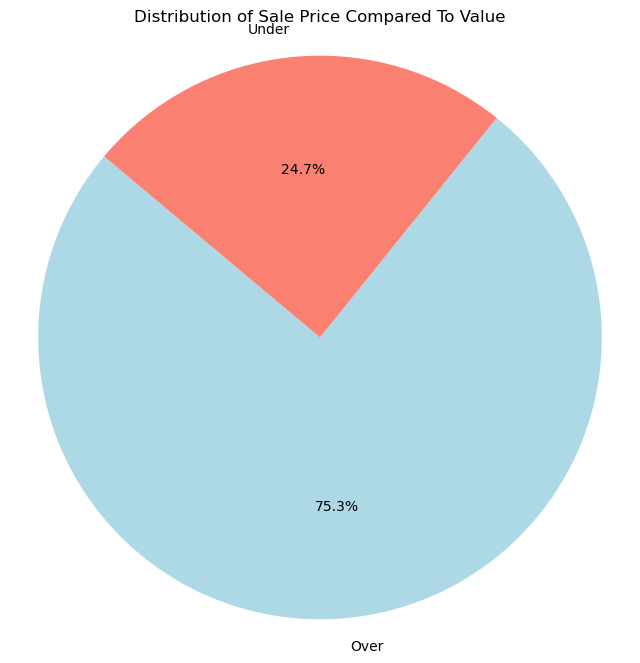

In [31]:
# Calculate the distribution of values
value_counts = df['Sale Price Compared To Value'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Distribution of Sale Price Compared To Value')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

<Figure size 1000x600 with 0 Axes>

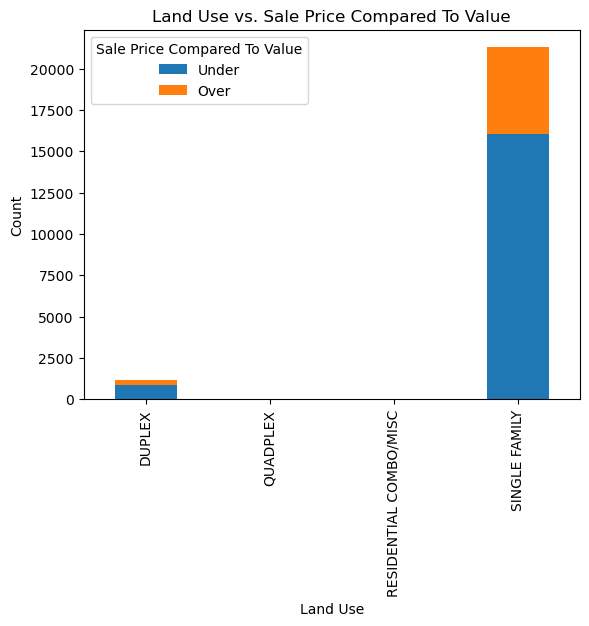

In [32]:
# Bar Plot for "Land Use" vs. "Sale Price Compared To Value":
plt.figure(figsize=(10, 6))
pd.crosstab(df['Land Use'], df['Sale Price Compared To Value']).plot(kind='bar', stacked=True)
plt.title('Land Use vs. Sale Price Compared To Value')
plt.xlabel('Land Use')
plt.ylabel('Count')
plt.legend(title='Sale Price Compared To Value', labels=['Under', 'Over'])
plt.show()

<Figure size 1000x600 with 0 Axes>

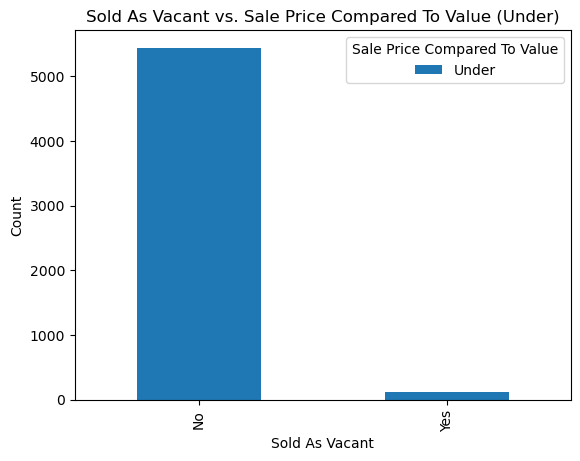

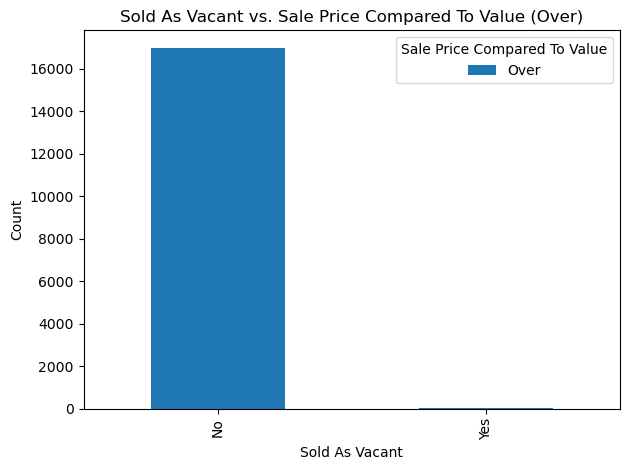

In [33]:
#Bar Plot for "Sold As Vacant" vs. "Sale Price Compared To Value"
plt.figure(figsize=(10, 6))
# Filter the data for 'Sale Price Compared To Value' equal to 'Under'
df_under = df[df['Sale Price Compared To Value'] == 'Under']
pd.crosstab(df_under['Sold As Vacant'], df_under['Sale Price Compared To Value']).plot(kind='bar')
plt.title('Sold As Vacant vs. Sale Price Compared To Value (Under)')
plt.xlabel('Sold As Vacant')
plt.ylabel('Count')
plt.legend(title='Sale Price Compared To Value', labels=['Under'])

# Filter the data for 'Sale Price Compared To Value' equal to 'Over'
df_over = df[df['Sale Price Compared To Value'] == 'Over']
pd.crosstab(df_over['Sold As Vacant'], df_over['Sale Price Compared To Value']).plot(kind='bar')
plt.title('Sold As Vacant vs. Sale Price Compared To Value (Over)')
plt.xlabel('Sold As Vacant')
plt.ylabel('Count')
plt.legend(title='Sale Price Compared To Value', labels=['Over'])
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

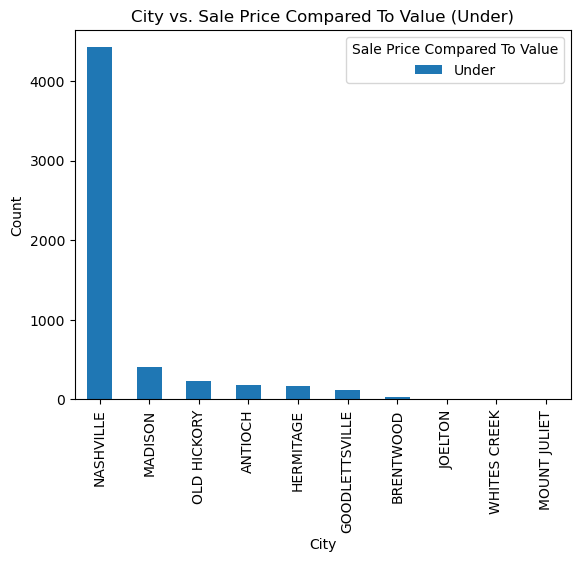

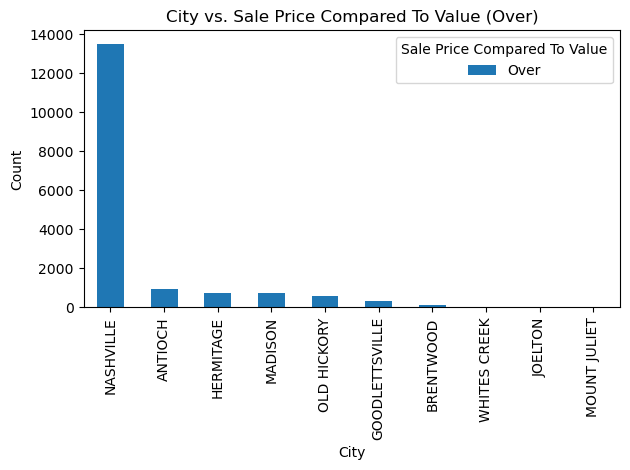

In [34]:
#Bar Plot for "City" vs. "Sale Price Compared To Value":
# Filter the data for 'Sale Price Compared To Value' equal to 'Under'
df_under = df[df['Sale Price Compared To Value'] == 'Under']
df_under_counts = df_under['City'].value_counts().sort_values(ascending=False)
df_under = df_under[df_under['City'].isin(df_under_counts.index)]

# Filter the data for 'Sale Price Compared To Value' equal to 'Over'
df_over = df[df['Sale Price Compared To Value'] == 'Over']
df_over_counts = df_over['City'].value_counts().sort_values(ascending=False)
df_over = df_over[df_over['City'].isin(df_over_counts.index)]

plt.figure(figsize=(12, 6))
pd.crosstab(df_under['City'], df_under['Sale Price Compared To Value']).loc[df_under_counts.index].plot(kind='bar')
plt.title('City vs. Sale Price Compared To Value (Under)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sale Price Compared To Value', labels=['Under'])

pd.crosstab(df_over['City'], df_over['Sale Price Compared To Value']).loc[df_over_counts.index].plot(kind='bar')
plt.title('City vs. Sale Price Compared To Value (Over)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sale Price Compared To Value', labels=['Over'])

plt.tight_layout()
plt.show()

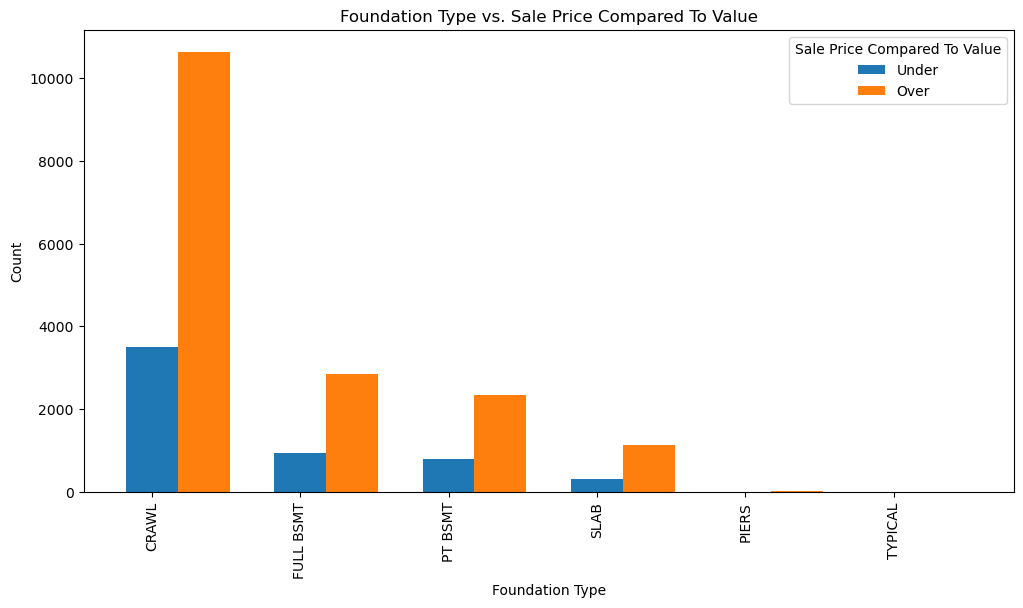

In [35]:
# Filter the data for 'Sale Price Compared To Value' equal to 'Under'
df_under = df[df['Sale Price Compared To Value'] == 'Under']
df_under_counts = df_under['Foundation Type'].value_counts().sort_values(ascending=False)
df_under = df_under[df_under['Foundation Type'].isin(df_under_counts.index)]

# Filter the data for 'Sale Price Compared To Value' equal to 'Over'
df_over = df[df['Sale Price Compared To Value'] == 'Over']
df_over_counts = df_over['Foundation Type'].value_counts().sort_values(ascending=False)
df_over = df_over[df_over['Foundation Type'].isin(df_over_counts.index)]

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Define the positions for bars
positions = range(len(df_under_counts.index))
bar_width = 0.35

# Bar plot for 'Under' values
ax.bar(positions, df_under_counts, bar_width, label='Under', align='center')

# Bar plot for 'Over' values
ax.bar([p + bar_width for p in positions], df_over_counts, bar_width, label='Over', align='center')

plt.title('Foundation Type vs. Sale Price Compared To Value')
plt.xlabel('Foundation Type')
plt.ylabel('Count')
plt.xticks(positions, df_under_counts.index, rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Sale Price Compared To Value')
plt.show()

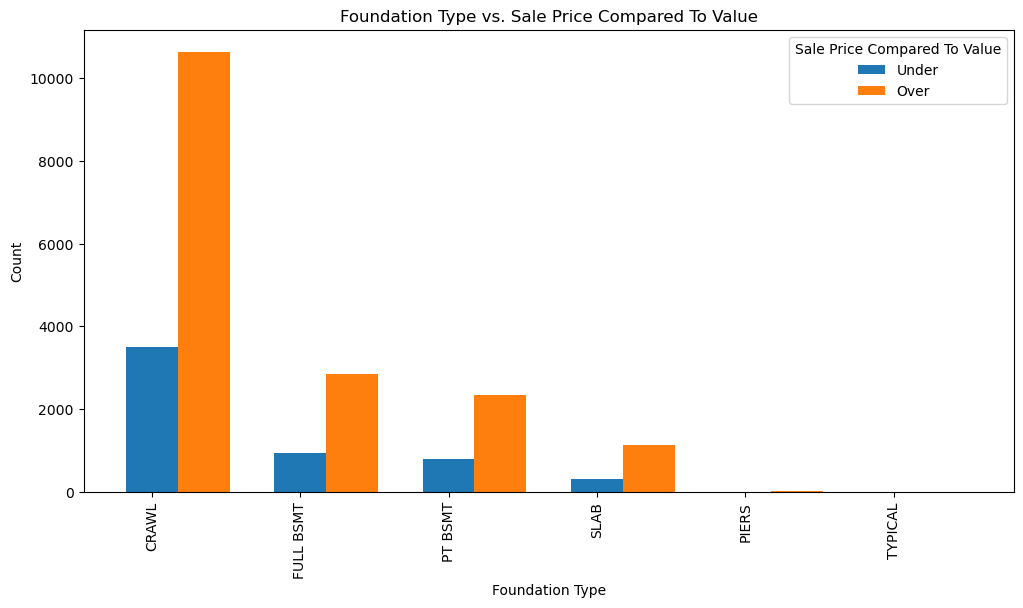

In [36]:
# Filter the data for 'Sale Price Compared To Value' equal to 'Under'
df_under = df[df['Sale Price Compared To Value'] == 'Under']
df_under_counts = df_under['Foundation Type'].value_counts().sort_values(ascending=False)
df_under = df_under[df_under['Foundation Type'].isin(df_under_counts.index)]

# Filter the data for 'Sale Price Compared To Value' equal to 'Over'
df_over = df[df['Sale Price Compared To Value'] == 'Over']
df_over_counts = df_over['Foundation Type'].value_counts().sort_values(ascending=False)
df_over = df_over[df_over['Foundation Type'].isin(df_over_counts.index)]

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Define the positions for bars
positions = range(len(df_under_counts.index))
bar_width = 0.35

# Bar plot for 'Under' values
ax.bar(positions, df_under_counts, bar_width, label='Under', align='center')

# Bar plot for 'Over' values
ax.bar([p + bar_width for p in positions], df_over_counts, bar_width, label='Over', align='center')

plt.title('Foundation Type vs. Sale Price Compared To Value')
plt.xlabel('Foundation Type')
plt.ylabel('Count')
plt.xticks(positions, df_under_counts.index, rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Sale Price Compared To Value')
plt.show()

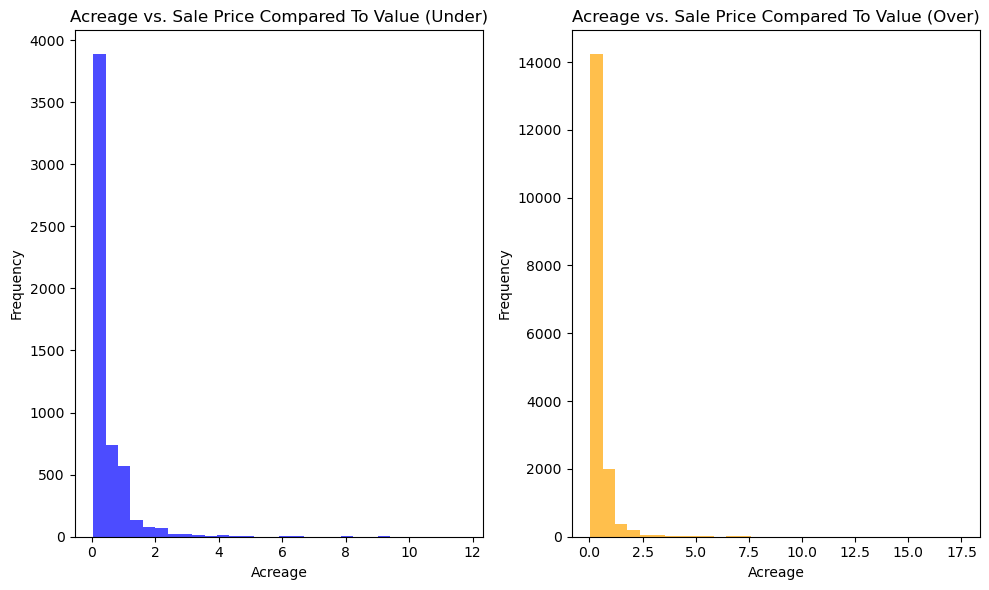

In [37]:
# Create a histogram for "Acreage" vs. "Sale Price Compared To Value"
# Filter the data for 'Sale Price Compared To Value' equal to 'Under'
df_under = df[df['Sale Price Compared To Value'] == 'Under']
acreage_under = df_under['Acreage']

# Filter the data for 'Sale Price Compared To Value' equal to 'Over'
df_over = df[df['Sale Price Compared To Value'] == 'Over']
acreage_over = df_over['Acreage']

# Create two separate figures and axes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Create a subplot on the left side

# Plot the histogram for 'Under' values
plt.hist(acreage_under, bins=30, color='blue', alpha=0.7)
plt.title('Acreage vs. Sale Price Compared To Value (Under)')
plt.xlabel('Acreage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Create a subplot on the right side

# Plot the histogram for 'Over' values
plt.hist(acreage_over, bins=30, color='orange', alpha=0.7)
plt.title('Acreage vs. Sale Price Compared To Value (Over)')
plt.xlabel('Acreage')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

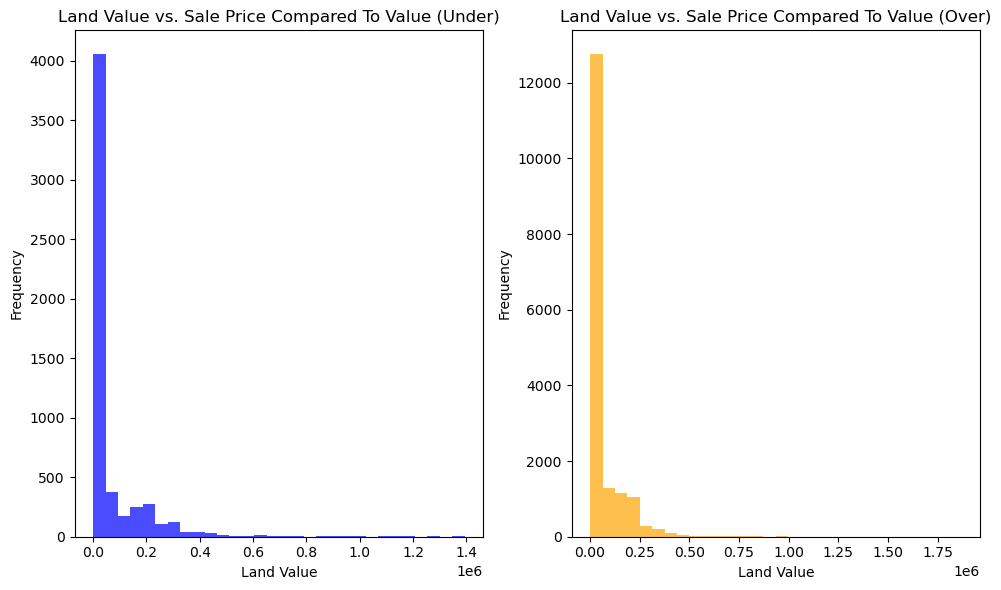

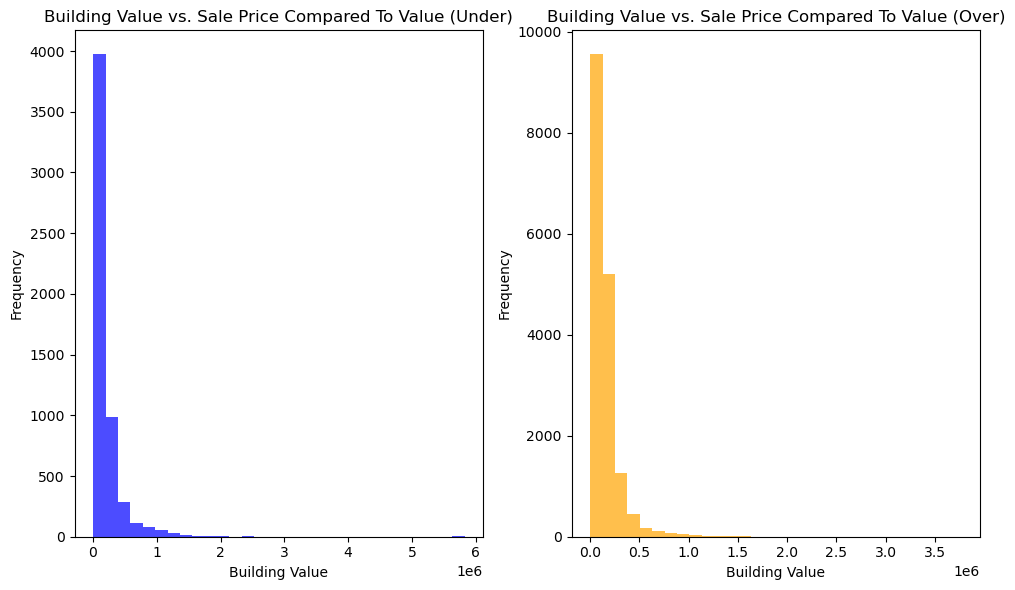

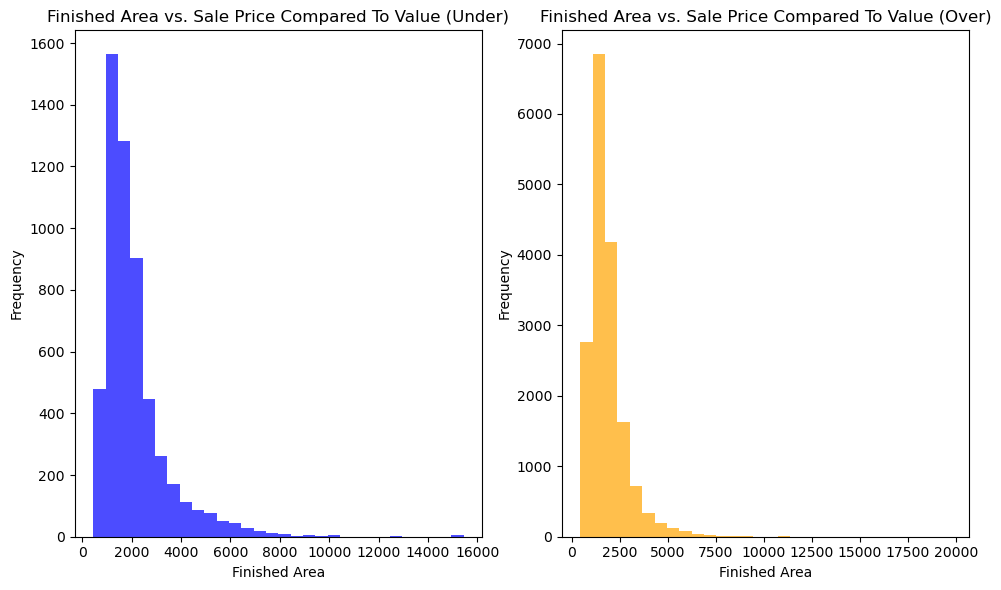

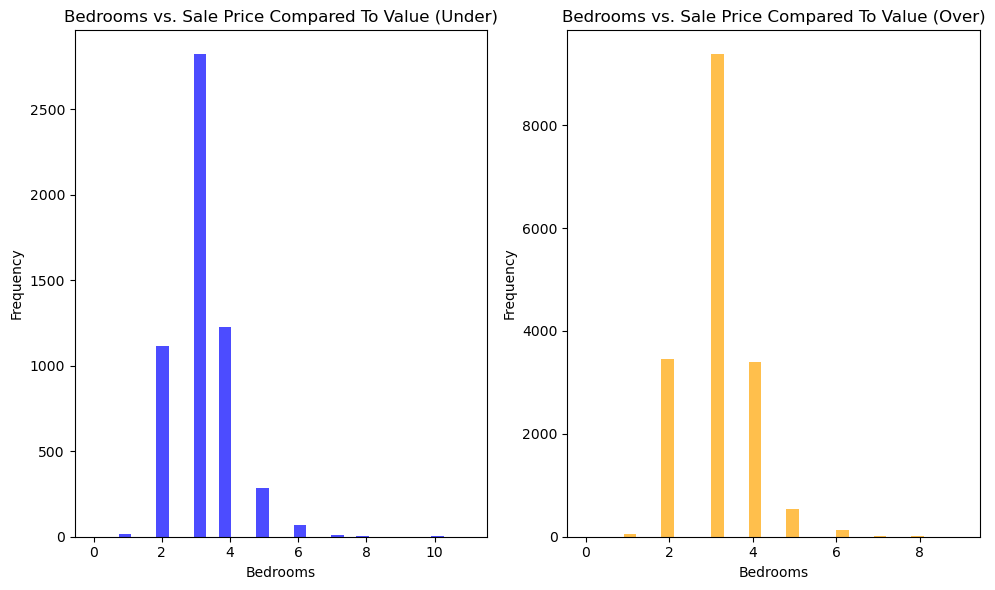

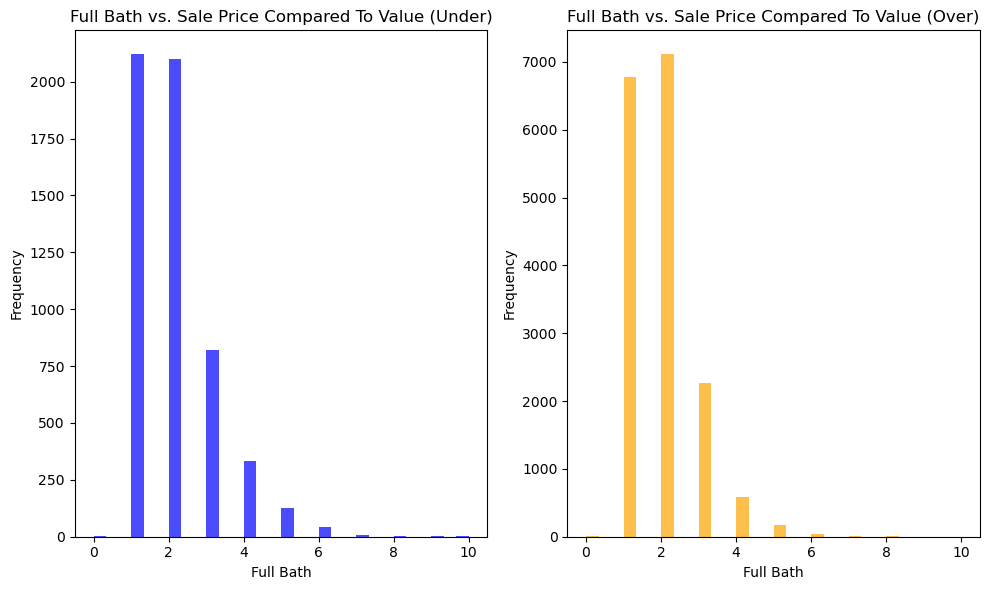

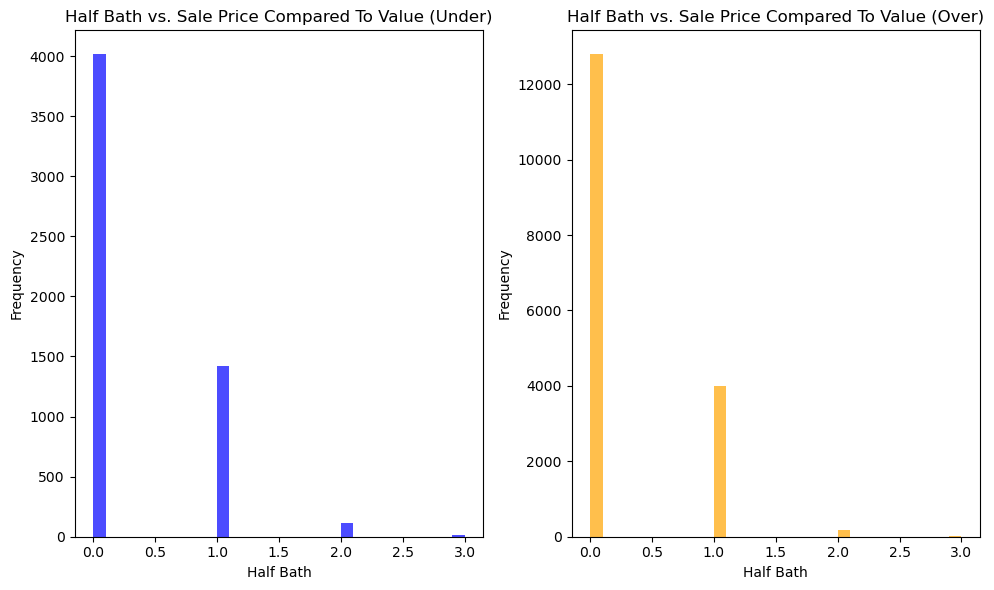

In [38]:
# List of numerical variables
numerical_columns = ["Land Value", "Building Value", "Finished Area", "Bedrooms", "Full Bath", "Half Bath"]

# Create separate histograms for each numerical variable vs. "Sale Price Compared To Value"
for col in numerical_columns:
    # Filter the data for 'Sale Price Compared To Value' equal to 'Under'
    df_under = df[df['Sale Price Compared To Value'] == 'Under']
    values_under = df_under[col]

    # Filter the data for 'Sale Price Compared To Value' equal to 'Over'
    df_over = df[df['Sale Price Compared To Value'] == 'Over']
    values_over = df_over[col]

    # Create a figure and axes
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)  # Create a subplot on the left side

    # Plot the histogram for 'Under' values
    plt.hist(values_under, bins=30, color='blue', alpha=0.7)
    plt.title(f'{col} vs. Sale Price Compared To Value (Under)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)  # Create a subplot on the right side

    # Plot the histogram for 'Over' values
    plt.hist(values_over, bins=30, color='orange', alpha=0.7)
    plt.title(f'{col} vs. Sale Price Compared To Value (Over)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

In [39]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Label encoding and test data split 

In [40]:
# Label Encoding for categorical features
label_encoder = LabelEncoder()
categorical_columns = df_copy.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])


In [41]:
df_copy.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Building Age,Days Since Last Sale
0,3,0,0,7,0.17,6,32000,134400,1149.00000,3,0,3,2.0,1.0,0.0,0,82,3642
1,3,0,0,7,0.11,1,34000,157800,2090.82495,4,1,3,3.0,2.0,1.0,0,23,3635
2,3,0,0,7,0.17,6,25000,243700,2145.60001,1,1,2,4.0,2.0,0.0,1,75,3635
3,3,0,0,7,0.34,6,25000,138100,1969.00000,0,3,3,2.0,1.0,0.0,1,113,3630
4,3,0,0,7,0.17,6,25000,86100,1037.00000,0,3,3,2.0,1.0,0.0,1,78,3649


In [42]:
# Assuming 'Sale Price Compared To Value' is the target variable, and other columns are potential predictors

# Split the data into X_lr (predictors) and y_lr (target)
X_lr = df_copy.drop('Sale Price Compared To Value', axis=1)  # X_lr contains all columns except the target
y_lr = df_copy['Sale Price Compared To Value']  # y_lr contains only the target variable

In [43]:
# Split the data into training (75%) and test (25%) sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.25, random_state=42)

# Logistic regression Model

In [44]:
# Add a constant (intercept) to the training predictor variables
X_train_lr_const = sm.add_constant(X_train_lr)

# Create the logistic regression model
logr_model = sm.Logit(y_train_lr, X_train_lr_const)

# Fit the model
logr_fit = logr_model.fit()

# Print the summary of the logistic regression model
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.496150
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                16907
Model:                                    Logit   Df Residuals:                    16889
Method:                                     MLE   Df Model:                           17
Date:                          Sun, 15 Oct 2023   Pseudo R-squ.:                  0.1144
Time:                                  18:22:58   Log-Likelihood:                -8388.4
converged:                                 True   LL-Null:                       -9472.4
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [45]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
model = logistic_regression.fit(X_train_lr, y_train_lr)

# Predict the response for the test dataset
Y_predict = model.predict(X_test_lr)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_lr, Y_predict)

# Calculate precision, recall, and F1-score
precision_lr = precision_score(y_test_lr, Y_predict)
recall_lr = recall_score(y_test_lr, Y_predict)
f1score_lr = f1_score(y_test_lr, Y_predict, average='weighted')

# Print the model performance metrics
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1score_lr)

Accuracy: 0.758694109297374
Precision: 0.5853658536585366
Recall: 0.01755669348939283
F1 Score: 0.661286988101736


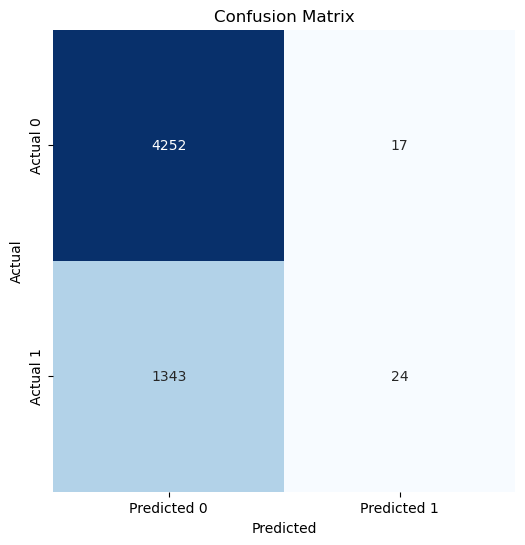

In [46]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_lr, Y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [48]:
# Create a Decision Tree classifier
classifier1 = DecisionTreeClassifier()

# Train the model on the training data
classifier1.fit(X_train_lr, y_train_lr)

# Predicting the test set result
y_pred = classifier1.predict(X_test_lr)

# Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_lr, y_pred)

print('Decision Trees Results')

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_lr, y_pred)
print(f'Accuracy score of Decision Trees Model is {accuracy_dt}')

# Print the confusion matrix
print('Confusion Matrix')
print(cm)

# Calculate precision, recall, and F1-score
print(classification_report(y_test_lr, y_pred))

precision_dt = metrics.precision_score(y_test_lr, y_pred)
recall_dt = metrics.recall_score(y_test_lr, y_pred)
f1score_dt = f1_score(y_test_lr, y_pred, average='weighted')


Decision Trees Results
Accuracy score of Decision Trees Model is 0.7198367636621718
Confusion Matrix
[[3436  833]
 [ 746  621]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4269
           1       0.43      0.45      0.44      1367

    accuracy                           0.72      5636
   macro avg       0.62      0.63      0.63      5636
weighted avg       0.73      0.72      0.72      5636



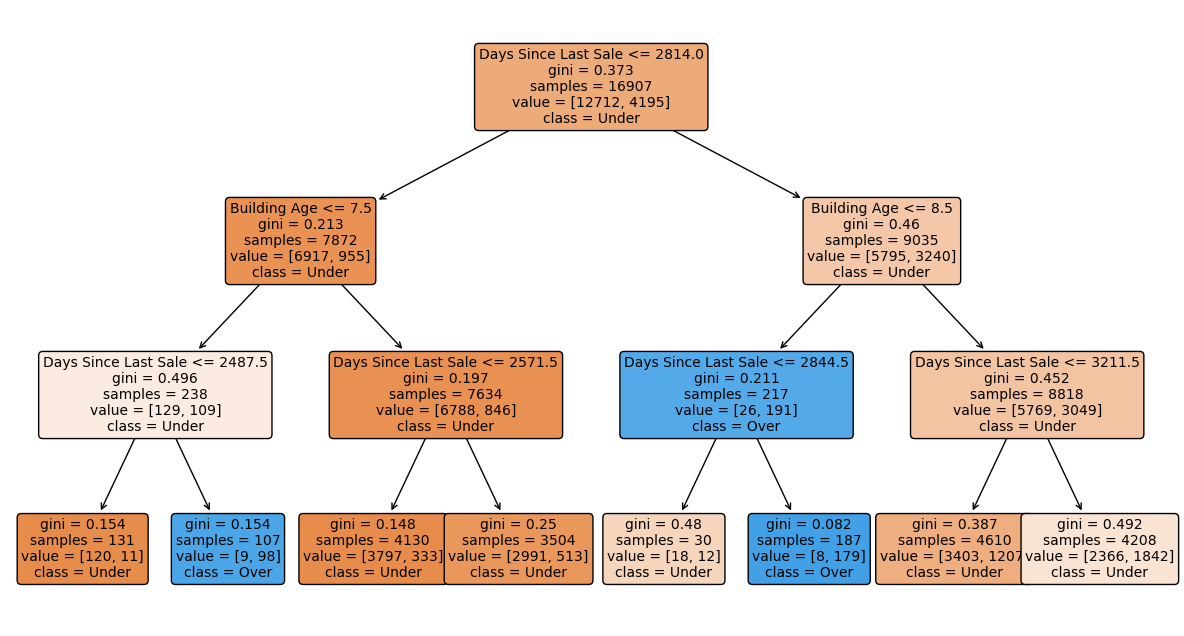

In [49]:
# Create a Decision Tree model with a maximum depth of 3
treemodel = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
treemodel.fit(X_train_lr, y_train_lr)

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot = tree.plot_tree(treemodel, feature_names=X_lr.columns, class_names=['Under', 'Over'], filled=True, rounded=True, fontsize=10)
plt.show()

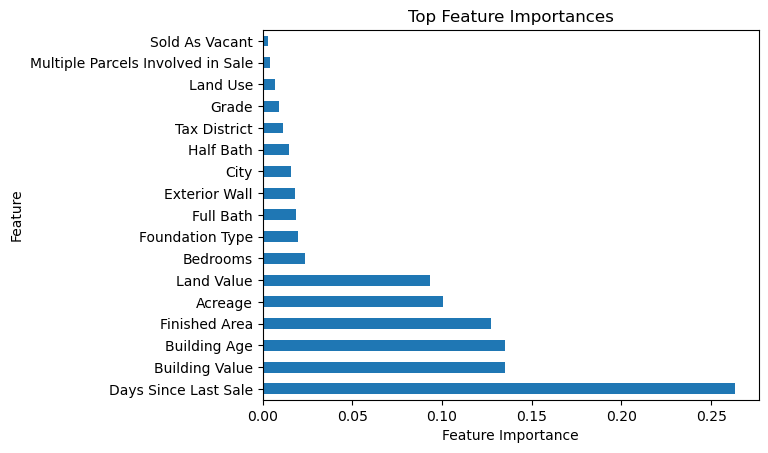

In [50]:
# Calculate feature importances
feature_importances = pd.Series(classifier1.feature_importances_, index=X_train_lr.columns)

# Plot the top most important features
top_features = feature_importances.nlargest(20)
top_features.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()

# Random Forest

Random Forest Classifier Results
Accuracy score of Random Forest Classifier Model is 0.7938254080908446
Confusion Matrix
[[4027  242]
 [ 920  447]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4269
           1       0.65      0.33      0.43      1367

    accuracy                           0.79      5636
   macro avg       0.73      0.64      0.65      5636
weighted avg       0.77      0.79      0.77      5636



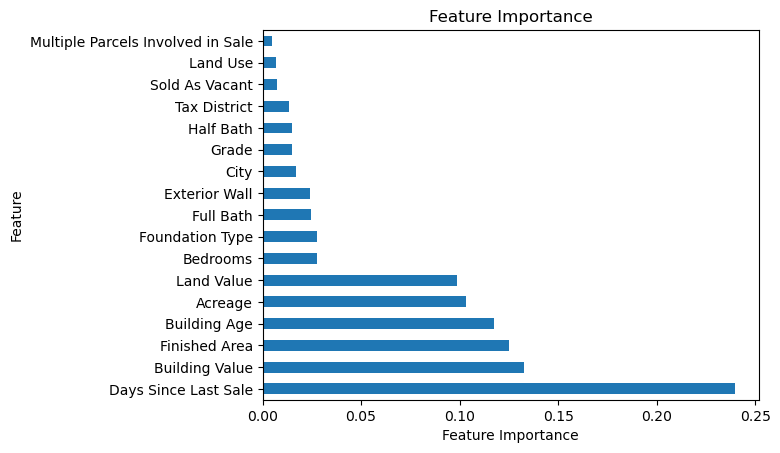

In [52]:
# Create and train the Random Forest Classifier
classifier2 = RandomForestClassifier(n_estimators=50, criterion="entropy")
classifier2.fit(X_train_lr, y_train_lr)

# Predict the test set results
y_pred = classifier2.predict(X_test_lr)

# Create the confusion matrix
cm = confusion_matrix(y_test_lr, y_pred)

# Print results
print('Random Forest Classifier Results')
accuracy_rf = accuracy_score(y_test_lr, y_pred)
print('Accuracy score of Random Forest Classifier Model is {ans}'.format(ans=accuracy_rf))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test_lr, y_pred))  # Classification report for RandomForestClassifier model prediction

# Calculate and plot feature importances
feat_importances = pd.Series(classifier2.feature_importances_, index=X_train_lr.columns)
top_features = feat_importances.nlargest(20)
top_features.plot(kind='barh', title='Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Calculate precision, recall, and F1-score
precision_rf = metrics.precision_score(y_test_lr, y_pred)
recall_rf = metrics.recall_score(y_test_lr, y_pred)
f1score_rf = f1_score(y_test_lr, y_pred, average='weighted')

# Gradient Boosting

Gradient Boosting Classifier Results
Accuracy score of Gradient Boosting Classifier Model is 0.7869056068133428
Confusion Matrix
[[4063  206]
 [ 995  372]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4269
           1       0.64      0.27      0.38      1367

    accuracy                           0.79      5636
   macro avg       0.72      0.61      0.63      5636
weighted avg       0.76      0.79      0.75      5636



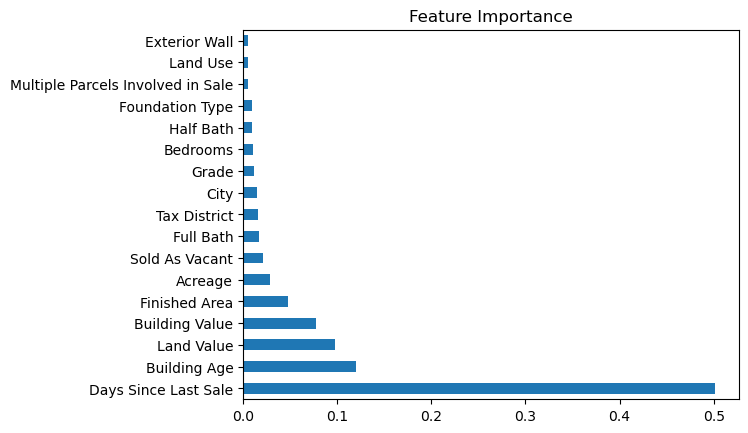

In [53]:
# Create a Gradient Boosting Classifier
classifier3 = GradientBoostingClassifier(n_estimators=60, learning_rate=0.5, max_features=2, max_depth=3, random_state=0)

# Train the model on the training data
classifier3.fit(X_train_lr, y_train_lr)

# Predicting the test set result
y_pred = classifier3.predict(X_test_lr)

# Creating the Confusion matrix
cm = confusion_matrix(y_test_lr, y_pred)

print('Gradient Boosting Classifier Results')

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_lr, y_pred)
print(f'Accuracy score of Gradient Boosting Classifier Model is {accuracy_gb}')

# Print the confusion matrix
print('Confusion Matrix')
print(cm)

# Calculate precision, recall, and F1-score
print(classification_report(y_test_lr, y_pred))

precision_gb = precision_score(y_test_lr, y_pred)
recall_gb = recall_score(y_test_lr, y_pred)
f1score_gb = f1_score(y_test_lr, y_pred, average='weighted')

# Feature importance using the Gradient Boosting Classifier
feature_importances = pd.Series(classifier3.feature_importances_, index=X_train_lr.columns)

# Plot the top most important features
top_features = feature_importances.nlargest(20)
top_features.plot(kind='barh', title='Feature Importance')
plt.show()

# Model Comparision

In [54]:
# Create a DataFrame to store model scores
nash_frame_score = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Fill in the DataFrame with scores for each model
nash_frame_score.at[0, 'Model Name'] = 'Logistic Regression'
nash_frame_score.at[0, 'Accuracy'] = accuracy_lr
nash_frame_score.at[0, 'Precision'] = precision_lr
nash_frame_score.at[0, 'Recall'] = recall_lr
nash_frame_score.at[0, 'F1-Score'] = f1score_lr

nash_frame_score.at[1, 'Model Name'] = 'Decision Trees Classifier'
nash_frame_score.at[1, 'Accuracy'] = accuracy_dt
nash_frame_score.at[1, 'Precision'] = precision_dt
nash_frame_score.at[1, 'Recall'] = recall_dt
nash_frame_score.at[1, 'F1-Score'] = f1score_dt

nash_frame_score.at[2, 'Model Name'] = 'Random Forest Classifier'
nash_frame_score.at[2, 'Accuracy'] = accuracy_rf
nash_frame_score.at[2, 'Precision'] = precision_rf
nash_frame_score.at[2, 'Recall'] = recall_rf
nash_frame_score.at[2, 'F1-Score'] = f1score_rf

nash_frame_score.at[3, 'Model Name'] = 'Gradient Boosting Classifier'
nash_frame_score.at[3, 'Accuracy'] = accuracy_gb
nash_frame_score.at[3, 'Precision'] = precision_gb
nash_frame_score.at[3, 'Recall'] = recall_gb
nash_frame_score.at[3, 'F1-Score'] = f1score_gb


In [55]:
nash_frame_score

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.758694,0.585366,0.017557,0.661287
1,Decision Trees Classifier,0.719837,0.427098,0.454279,0.722715
2,Random Forest Classifier,0.793825,0.648766,0.326993,0.767415
3,Gradient Boosting Classifier,0.786906,0.643599,0.272129,0.752697
